# Проект АДВБ
## Выполнили: Новикова Дарья, Семёнова Анна, Шварц Елена


Ссылка на используемые данные:
https://drive.google.com/drive/folders/1DZykMFUA4FWV6WA3YSJgfGzcu2JHj5f5?usp=sharing

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [4]:
data_raw = pd.read_excel('electronika_03_04.xlsx', sheet_name = "Лист1")

In [5]:
data_full = data_raw

In [6]:
data_full.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,ab/ac/ad/ae,Unnamed: 38
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,1.0,1157790.0,Доставка до точки выдачи,Доставка,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,35554.0,1.0,NaN
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,3.0,1138110.0,"""Гарант +"" - Договор страхования, обеспечивающ...",Гарант +,1.0,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0,1.0,NaN
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,2.0,1180135.0,Телевизор LED Samsung UE-40J6200AU Smart,Smart телевизоры,1.0,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0,1.0,NaN
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,0.0,96665.66,1.0,1104611.0,"Доставка ""Стандарт"" зона 0",Доставка,1.0,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0,1.0,NaN
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,0.0,96665.66,4.0,1087811.0,"Крепление LCD-телевизора на стену, подключение...",Установка и настройка ТВ,2.0,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0,1.0,NaN


In [7]:
#избавимся от некоторых столбцов

#из дат оставим только дату заказа
data_full.pop('время') 
data_full.pop('месяц') 
data_full.pop('ChangeDate')
data_full.pop('DeliveryDate')
data_full.pop('PaymentDate')

#Status и Status_Id не нужны, т.к. остались только доставленные заказы
data_full.pop('Status')

#переменная одинаковая для всех строк в чеке. Позиция в чеке так же не важна
data_full.pop('Row_ID')

#для идентификации товара использем только столбец NomGroup
data_full.pop('Articul')
data_full.pop('Discount')
data_full.pop('Brand')

data_full.pop('NomFullPath')

data_full.pop('Week')
data_full.pop('Nom_ID')


0          35554.0
1          16686.0
2          95567.0
3          29329.0
4           2748.0
            ...   
357031     92697.0
357032     35554.0
357033    111803.0
357034     35554.0
357035    111803.0
Name: Nom_ID, Length: 357036, dtype: float64

In [8]:
data_full.pop('Nom_Name')

0                                  Доставка до точки выдачи
1         "Гарант +" - Договор страхования, обеспечивающ...
2                  Телевизор LED Samsung UE-40J6200AU Smart
3                                Доставка "Стандарт" зона 0
4         Крепление LCD-телевизора на стену, подключение...
                                ...                        
357031              Телевизор LED Samsung UE-105S9WAT Smart
357032                             Доставка до точки выдачи
357033                   LED Телевизор Philips 40PFT4100/60
357034                             Доставка до точки выдачи
357035                   LED Телевизор Philips 40PFT4100/60
Name: Nom_Name, Length: 357036, dtype: object

In [9]:
data_full.dtypes

Order_ID                object
Email_new               object
Phone_new               object
Source                  object
OrderDate       datetime64[ns]
Status_ID                int64
OneClick                 int64
CancelReason            object
Actions                 object
DeliveryType            object
PaymentType             object
Region                  object
Area                    object
Store_ID                 int64
FullSum                float64
IM_Rozn_Sum            float64
NomGroup                object
Quant                  float64
RowPrice               float64
RowDiscount            float64
RowSum                 float64
TN                      object
TK                      object
ab/ac/ad/ae            float64
Unnamed: 38            float64
dtype: object

In [10]:
#удалить стриоки с пропусками в столбцах TK и TN
data_full['TK'].replace('', np.nan, inplace=True)
data_full['TN'].replace('', np.nan, inplace=True)

In [11]:
data_full.dropna(subset=['TK'], inplace=True)
data_full.dropna(subset=['TN'], inplace=True)

In [12]:
data_full.isna().sum()

Order_ID             0
Email_new            0
Phone_new            0
Source               0
OrderDate            0
Status_ID            0
OneClick             0
CancelReason    123200
Actions         138818
DeliveryType      4156
PaymentType          0
Region               1
Area               842
Store_ID             0
FullSum              0
IM_Rozn_Sum          0
NomGroup             0
Quant                0
RowPrice             0
RowDiscount          0
RowSum               0
TN                   0
TK                   0
ab/ac/ad/ae     190411
Unnamed: 38     190932
dtype: int64

In [13]:
#нужно убрать наблюдения с отрицательным значением скидки
data_full = data_full.loc[data_full['RowDiscount'] >= 0]

In [14]:
len(data_full)

190930

In [16]:
#добавим федеральный округ
regions = pd.read_excel('regions.xlsx')

In [17]:
data_w_fo = pd.merge(data_full, regions, "left")

In [18]:
#проверяем на пропуски
data_w_fo.isna().sum()

Order_ID             0
Email_new            0
Phone_new            0
Source               0
OrderDate            0
Status_ID            0
OneClick             0
CancelReason    123199
Actions         138818
DeliveryType      4156
PaymentType          0
Region               1
Area               842
Store_ID             0
FullSum              0
IM_Rozn_Sum          0
NomGroup             0
Quant                0
RowPrice             0
RowDiscount          0
RowSum               0
TN                   0
TK                   0
ab/ac/ad/ae     190406
Unnamed: 38     190927
FO                 843
dtype: int64

In [19]:
data_w_fo

,Order_ID,Email_new,Phone_new,Source,OrderDate,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,IM_Rozn_Sum,NomGroup,Quant,RowPrice,RowDiscount,RowSum,TN,TK,ab/ac/ad/ae,Unnamed: 38,FO
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,39519.00,Smart телевизоры,1.0,35999.0,0.0,35999.0,ТВ-Аудио,Телевизоры LCD,1.0,NaN,CENTRAL
1,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,96665.66,Smart телевизоры,2.0,32999.0,0.0,65998.0,ТВ-Аудио,Телевизоры LCD,1.0,NaN,CENTRAL
2,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,96665.66,Антенны,2.0,999.0,0.0,1998.0,Аксессуары,Аксессуары ТВ-Аудио,1.0,NaN,CENTRAL
3,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,2970.00,2970.00,Гладильные доски,1.0,2970.0,0.0,2970.0,Товары для дома,Хозтовары,1.0,NaN,CENTRAL
4,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3305,19490.00,19490.00,Мультиварки,1.0,19490.0,0.0,19490.0,Мелкая бытовая техника,Приготовление пищи,1.0,NaN,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190925,5898108_BX,566102117_fu20@rambler.ru,55574851-54534948525271,Онлайн-Резерв.,2016-04-30,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Ростов-на-Дону,Ростовская обл.,3483,900.00,900.00,Настольные игры,1.0,900.0,0.0,900.0,Детские товары,Игрушки,NaN,NaN,SOUTHERN
190926,75511561_BX,0,0,Терминал,2016-03-18,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,17999.00,17999.00,Smart телевизоры,1.0,17999.0,0.0,17999.0,ТВ-Аудио,Телевизоры LCD,NaN,NaN,CENTRAL
190927,75511562_BX,0,0,Терминал,2016-03-18,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3305,1.00,1.00,3D телевизоры,1.0,1.0,0.0,1.0,ТВ-Аудио,Телевизоры LCD,NaN,NaN,CENTRAL
190928,75511563_BX,0,0,Терминал,2016-03-15,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,26990.00,26990.00,LED телевизоры,1.0,26990.0,0.0,26990.0,ТВ-Аудио,Телевизоры LCD,NaN,NaN,CENTRAL


In [21]:
data_w_fo.to_excel("data_w_fo.xlsx", index = False)

In [22]:
#сохраним в отдельный файл
data_full.to_excel("data_full.xlsx", index = False)

data_full:
    - удалены строки с пропусками в столбцах TK и TN (услуги);
    - удалены 6 наблюдений с отрицательной скидкой;

In [24]:
data_14 = data_w_fo[data_w_fo.Status_ID == 14]

In [25]:
data_14.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,IM_Rozn_Sum,NomGroup,Quant,RowPrice,RowDiscount,RowSum,TN,TK,ab/ac/ad/ae,Unnamed: 38,FO
12,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,14,0,NaN,NaN,Самовывоз,КартойПриПолучении,Москва,Москва,3518,2420.0,2420.0,Картриджи струйные,1.0,2420.0,0.0,2420.0,Аксессуары,Картриджи и бумага,1.0,NaN,CENTRAL
13,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,Наличные,Санкт-Петербург,Ленинградская обл.,2656,8999.0,8999.0,Электрические плиты,1.0,10999.0,2000.0,8999.0,Крупная бытовая техника,Плиты,1.0,NaN,NORTH
15,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,14,0,NaN,NaN,Самовывоз,Наличные,Москва,Москва,3244,1790.0,1790.0,Термометры и метеостанции,1.0,1790.0,0.0,1790.0,Цифровая Техника,Портативная электроника,1.0,NaN,CENTRAL
16,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,14,0,NaN,NaN,Самовывоз,Наличные,Псков,Псковская обл.,3695,1420.0,1420.0,Триммеры для бороды и усов,1.0,1420.0,0.0,1420.0,Мелкая бытовая техника,Красота и здоровье,1.0,NaN,NORTH
17,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,14,0,NaN,NaN,Самовывоз,Наличные,Смоленск,Смоленская обл.,3344,249.0,249.0,Аксессуары для гитар и синтезаторов,1.0,249.0,0.0,249.0,ТВ-Аудио,Музыкальные инструменты,1.0,NaN,CENTRAL


In [26]:
#Status_ID больше не нужен, здесь только выданные заказы
data_14.pop('Status_ID')

12        14
13        14
15        14
16        14
17        14
          ..
190917    14
190920    14
190921    14
190922    14
190924    14
Name: Status_ID, Length: 123056, dtype: int64

In [27]:
#пропуски
data_14.isna().sum()

Order_ID             0
Email_new            0
Phone_new            0
Source               0
OrderDate            0
OneClick             0
CancelReason    122011
Actions          85440
DeliveryType        14
PaymentType          0
Region               0
Area               271
Store_ID             0
FullSum              0
IM_Rozn_Sum          0
NomGroup             0
Quant                0
RowPrice             0
RowDiscount          0
RowSum               0
TN                   0
TK                   0
ab/ac/ad/ae     122736
Unnamed: 38     123053
FO                 271
dtype: int64

In [28]:
data_14.columns

Index(['Order_ID', 'Email_new', 'Phone_new', 'Source', 'OrderDate', 'OneClick',
       'CancelReason', 'Actions', 'DeliveryType', 'PaymentType', 'Region',
       'Area', 'Store_ID', 'FullSum', 'IM_Rozn_Sum', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'TN', 'TK', 'ab/ac/ad/ae',
       'Unnamed: 38', 'FO'],
      dtype='object')

In [31]:
#сохраним в отдельный файл, чтобы не чистить каждый раз
data_14.to_excel("data.xlsx", index = False)

In [32]:
#загрузим новые данные
data2 = pd.read_excel('data.xlsx')

In [33]:
data = data2

In [34]:
#число наблюдений
n1 = len(data)

In [35]:
data.dtypes

Order_ID                object
Email_new               object
Phone_new               object
Source                  object
OrderDate       datetime64[ns]
OneClick                 int64
CancelReason            object
Actions                 object
DeliveryType            object
PaymentType             object
Region                  object
Area                    object
Store_ID                 int64
FullSum                float64
IM_Rozn_Sum            float64
NomGroup                object
Quant                    int64
RowPrice                 int64
RowDiscount              int64
RowSum                   int64
TN                      object
TK                      object
ab/ac/ad/ae            float64
Unnamed: 38            float64
FO                      object
dtype: object

In [36]:
#пропуски
data.isna().sum()

Order_ID             0
Email_new            0
Phone_new            0
Source               0
OrderDate            0
OneClick             0
CancelReason    122011
Actions          85440
DeliveryType        14
PaymentType          0
Region               0
Area               271
Store_ID             0
FullSum              0
IM_Rozn_Sum          0
NomGroup             0
Quant                0
RowPrice             0
RowDiscount          0
RowSum               0
TN                   0
TK                   0
ab/ac/ad/ae     122736
Unnamed: 38     123053
FO                 271
dtype: int64

In [37]:
#удаляем пропуски в столбцах DeliveryType, Area и FullSum (пропуски в последних восьми переменных относятся к одним и тем же наблюдениям)
data = data.dropna(subset = ['DeliveryType', 'Area', 'FullSum'])

In [38]:
#снова проверяем на пропуски
data.isna().sum()

Order_ID             0
Email_new            0
Phone_new            0
Source               0
OrderDate            0
OneClick             0
CancelReason    121730
Actions          85220
DeliveryType         0
PaymentType          0
Region               0
Area                 0
Store_ID             0
FullSum              0
IM_Rozn_Sum          0
NomGroup             0
Quant                0
RowPrice             0
RowDiscount          0
RowSum               0
TN                   0
TK                   0
ab/ac/ad/ae     122451
Unnamed: 38     122768
FO                   0
dtype: int64

In [39]:
data.describe()

,OneClick,Store_ID,FullSum,IM_Rozn_Sum,Quant,RowPrice,RowDiscount,RowSum,ab/ac/ad/ae,Unnamed: 38
count,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,320.000000,3.000000
mean,0.057367,3607.474224,10519.788664,11010.145808,1.050582,8321.889819,163.477482,8284.349065,0.984375,427.666667
std,0.232543,1304.611223,15104.004699,15764.264602,0.505278,11012.750612,752.054324,11033.802135,0.124214,184.752086
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,321.000000
25%,0.000000,3080.000000,2210.000000,2379.000000,1.000000,1630.000000,0.000000,1660.500000,1.000000,321.000000
50%,0.000000,3458.000000,5599.000000,5838.000000,1.000000,4460.000000,0.000000,4470.000000,1.000000,321.000000
75%,0.000000,3671.000000,12999.000000,13480.000000,1.000000,11399.000000,0.000000,11299.000000,1.000000,481.000000
max,1.000000,9999.000000,430280.000000,430280.000000,50.000000,429990.000000,40999.000000,429990.000000,1.000000,641.000000


In [40]:
data.describe()

,OneClick,Store_ID,FullSum,IM_Rozn_Sum,Quant,RowPrice,RowDiscount,RowSum,ab/ac/ad/ae,Unnamed: 38
count,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,320.000000,3.000000
mean,0.057367,3607.474224,10519.788664,11010.145808,1.050582,8321.889819,163.477482,8284.349065,0.984375,427.666667
std,0.232543,1304.611223,15104.004699,15764.264602,0.505278,11012.750612,752.054324,11033.802135,0.124214,184.752086
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,321.000000
25%,0.000000,3080.000000,2210.000000,2379.000000,1.000000,1630.000000,0.000000,1660.500000,1.000000,321.000000
50%,0.000000,3458.000000,5599.000000,5838.000000,1.000000,4460.000000,0.000000,4470.000000,1.000000,321.000000
75%,0.000000,3671.000000,12999.000000,13480.000000,1.000000,11399.000000,0.000000,11299.000000,1.000000,481.000000
max,1.000000,9999.000000,430280.000000,430280.000000,50.000000,429990.000000,40999.000000,429990.000000,1.000000,641.000000


In [41]:
#число выданных товаров
len(data)

122771

In [42]:
#число уникальных чеков
len(data["Order_ID"].unique())

107739

In [43]:
#среднее число товаров в одном чеке
round(len(data)/len(data["Order_ID"].unique()), 2)

1.14

In [44]:
#посмотрим на столбцы "Email_new" и "Phone_new"
data.Email_new.value_counts()

0                                20230
101117_eu14@inbox.ru               499
102117_fu16@yandex.ru              368
55666661117117_uu10@bk.ru          171
8115117_su33@yandex.ru             162
                                 ...  
566668105117_iu16@inbox.ru           1
556666111697_ta22@yandex.ua          1
5566666104117_hu25@mail.ru           1
5566668106103_jg16@gfghfg.uhg        1
556668112117_pu25@1gl-spb.ru         1
Name: Email_new, Length: 71770, dtype: int64

In [45]:
data.Phone_new.value_counts()

0                           2741
55574954-484951565653705    1055
55574850-51534848565673      323
55574953-54565256525374      273
55485656-57565656575275      115
                            ... 
55575456-52525448485477        1
55574954-53485053535677        1
55574950-575649535650785       1
55575653-54565249505772        1
55575349-50485350535279        1
Name: Phone_new, Length: 89300, dtype: int64

В столбце Phone_new меньше незаполненных строк, будем использовать его как идентификатор покупателя.

In [46]:
#число уникальных клиентов (одно значение для незаполненных полей)
len(data["Phone_new"].unique())

89300

In [47]:
#среднее число товаров, приходящихся на одного клиента
round(len(data)/len(data["Phone_new"].unique()), 2)

1.37

In [48]:
#среднее число чеков, приходящихся на одного клиента
round(len(data["Order_ID"].unique())/len(data["Phone_new"].unique()), 2)

1.21

Чтобы посчитать по регионам, надо сначала приклеить федеральный округ

In [49]:
len(data_w_fo)

190930

In [50]:
data_w_fo

,Order_ID,Email_new,Phone_new,Source,OrderDate,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,IM_Rozn_Sum,NomGroup,Quant,RowPrice,RowDiscount,RowSum,TN,TK,ab/ac/ad/ae,Unnamed: 38,FO
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,39519.00,Smart телевизоры,1.0,35999.0,0.0,35999.0,ТВ-Аудио,Телевизоры LCD,1.0,NaN,CENTRAL
1,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,96665.66,Smart телевизоры,2.0,32999.0,0.0,65998.0,ТВ-Аудио,Телевизоры LCD,1.0,NaN,CENTRAL
2,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,96665.66,Антенны,2.0,999.0,0.0,1998.0,Аксессуары,Аксессуары ТВ-Аудио,1.0,NaN,CENTRAL
3,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,2970.00,2970.00,Гладильные доски,1.0,2970.0,0.0,2970.0,Товары для дома,Хозтовары,1.0,NaN,CENTRAL
4,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3305,19490.00,19490.00,Мультиварки,1.0,19490.0,0.0,19490.0,Мелкая бытовая техника,Приготовление пищи,1.0,NaN,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190925,5898108_BX,566102117_fu20@rambler.ru,55574851-54534948525271,Онлайн-Резерв.,2016-04-30,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Ростов-на-Дону,Ростовская обл.,3483,900.00,900.00,Настольные игры,1.0,900.0,0.0,900.0,Детские товары,Игрушки,NaN,NaN,SOUTHERN
190926,75511561_BX,0,0,Терминал,2016-03-18,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,17999.00,17999.00,Smart телевизоры,1.0,17999.0,0.0,17999.0,ТВ-Аудио,Телевизоры LCD,NaN,NaN,CENTRAL
190927,75511562_BX,0,0,Терминал,2016-03-18,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3305,1.00,1.00,3D телевизоры,1.0,1.0,0.0,1.0,ТВ-Аудио,Телевизоры LCD,NaN,NaN,CENTRAL
190928,75511563_BX,0,0,Терминал,2016-03-15,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,26990.00,26990.00,LED телевизоры,1.0,26990.0,0.0,26990.0,ТВ-Аудио,Телевизоры LCD,NaN,NaN,CENTRAL


In [51]:
#снова проверяем на пропуски
data_w_fo.isna().sum()

Order_ID             0
Email_new            0
Phone_new            0
Source               0
OrderDate            0
Status_ID            0
OneClick             0
CancelReason    123199
Actions         138818
DeliveryType      4156
PaymentType          0
Region               1
Area               842
Store_ID             0
FullSum              0
IM_Rozn_Sum          0
NomGroup             0
Quant                0
RowPrice             0
RowDiscount          0
RowSum               0
TN                   0
TK                   0
ab/ac/ad/ae     190406
Unnamed: 38     190927
FO                 843
dtype: int64

Теперь у всех наблюдений есть федеральный округ

In [52]:
#удалим столбец Area
data_w_fo.pop('Area')

0                  Москва
1                  Москва
2                  Москва
3                  Москва
4                  Москва
               ...       
190925    Ростовская обл.
190926             Москва
190927             Москва
190928             Москва
190929             Москва
Name: Area, Length: 190930, dtype: object

In [53]:
#распределение выданных заказов по федеральному округу
data_w_fo.groupby('Region').count()['Order_ID']

Region
Барнаул               70
Белгород            2370
Великий Новгород     853
Владивосток           56
Владимир            1538
                    ... 
Уфа                 4079
Чебоксары             36
Челябинск           2460
Череповец           1252
Ярославль           2876
Name: Order_ID, Length: 73, dtype: int64

## RFM-сегментация

In [54]:
data = pd.read_excel('Vitrina.xlsx', sheet_name='Витрина')

In [55]:
data = data.drop(index=[89545])

In [56]:
data

,Клиент_ID,Кол-во чеков,Средний чек,Среднее число товаров,Выручка,Кол-во товаров,Дата последнего заказа,Кол-во примененных акций,Курьерская,Самовывоз,КартойПриПолучении,Квитанция Сбербанка,Кредит в магазине,Наличные,PayPal,RBK Money,Доля выкупа,One click,Доля отмен,central,north,far east,privolzie,siberia,southern,ural,Автотовары,Аксессуары,Детские товары,"Игры, софт и развлечения",Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,"Хобби, досуг",Цифровая Техника,Элитная техника,Автоакустика,Автоаудио,Автомагнитолы,Автомультимедия,Автопринадлежности,Автоэлектроника,Аккумуляторы,Аксессуары авто,Аксессуары детство,Аксессуары для бытовой техники,Аксессуары для игровых приставок,Аксессуары для комп./ноутбуков/принтеров,Аксессуары для мебели,Аксессуары для смартфонов и планшетов,Аксессуары для спортивных товаров,Аксессуары для фото/видео,Аксессуары ТВ-Аудио,Активный отдых,Антивирусные программы,Аудио-Видео,Аудиомагнитолы,"Ванна, баня и сауна",Ванная,Велосипеды и аксессуары,Вентиляторы бытовые,Видеокамеры,Водонагреватели,Воздухонагреватели,Встраиваемая техника,Встраиваемые духовые шкафы (VIP),Встраиваемые микроволновые печи (VIP),Гостиная,Декор интерьера,Детская комната,Для мам,Домашние театры,Единоборства,Зимние виды спорта,Игровые консоли,Игрушки,Игры для консолей,Индивидуальные виды спорта,Инструменты,Камины,Картриджи и бумага,Командные виды спорта,Компьютеры настольные,Компьютеры портативные,Кондиционеры,Контракты сотовой связи и НТВ+,Кормление,Красота и здоровье,Купание и уход,Кухня и Столовая,Мобильные средства связи,Музыкальные инструменты,Музыкальные центры,Мягкая мебель,Навигация,Наушники,Носители информации,Операционные системы,Освещение,Офис и Кабинет,Очистители воздуха,Периферийные устройства,Планшеты,Плиты,Подарки МБТ,Портативная электроника,Посудомоечные машины,Приготовление пищи,Прихожая,Прогулки и путешествие,Рыбалка,Садовая мебель,Сантехника,Свет,СВЧ,Сервировка стола,Сетевое оборудование,Силовая и садовая техника,Спальня,Средства связи,Стиральные машины,Сушильные машины,Текстиль,Телевизоры LCD,Товары для автолюбителей,Товары для дома и офиса,Товары для кухни,Тренажеры,Туризм,Тяжелая атлетика,Увлажнители,Умный дом,Упаковка,Услуги по пластиковым картам,Уход за домом,Фитнес,Фотоаппараты,Хозтовары,Холодильное оборудование,Швейная техника,Электропитание,DVD с записью,DVD/Blu-Ray плееры и компоненты,Hi-Fi компоненты
0,32565748-000000000,8,2469.625,1.0,19757,8,2016-04-26,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.484848,0.0,0.515152,0.875,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.375,0.125,0.0,0.0,0.125,0.0,0.125,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0
1,32565750-575448565151 а,2,13299.500,1.0,26599,2,2016-03-31,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1.0,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,32565750-575448565151 а5,1,1590.000,1.0,1590,1,2016-04-12,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,1.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,

In [57]:
# матрица корреляций
correlations = data.select_dtypes(include=['float64', 'int']).corr()
correlations

,Кол-во чеков,Средний чек,Среднее число товаров,Выручка,Кол-во товаров,Кол-во примененных акций,Курьерская,Самовывоз,КартойПриПолучении,Квитанция Сбербанка,Кредит в магазине,Наличные,PayPal,RBK Money,Доля выкупа,One click,Доля отмен,central,north,far east,privolzie,siberia,southern,ural,Автотовары,Аксессуары,Детские товары,"Игры, софт и развлечения",Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,"Хобби, досуг",Цифровая Техника,Элитная техника,Автоакустика,Автоаудио,Автомагнитолы,Автомультимедия,Автопринадлежности,Автоэлектроника,Аккумуляторы,Аксессуары авто,Аксессуары детство,Аксессуары для бытовой техники,Аксессуары для игровых приставок,Аксессуары для комп./ноутбуков/принтеров,Аксессуары для мебели,Аксессуары для смартфонов и планшетов,Аксессуары для спортивных товаров,Аксессуары для фото/видео,Аксессуары ТВ-Аудио,Активный отдых,Антивирусные программы,Аудио-Видео,Аудиомагнитолы,"Ванна, баня и сауна",Ванная,Велосипеды и аксессуары,Вентиляторы бытовые,Видеокамеры,Водонагреватели,Воздухонагреватели,Встраиваемая техника,Встраиваемые духовые шкафы (VIP),Встраиваемые микроволновые печи (VIP),Гостиная,Декор интерьера,Детская комната,Для мам,Домашние театры,Единоборства,Зимние виды спорта,Игровые консоли,Игрушки,Игры для консолей,Индивидуальные виды спорта,Инструменты,Камины,Картриджи и бумага,Командные виды спорта,Компьютеры настольные,Компьютеры портативные,Кондиционеры,Контракты сотовой связи и НТВ+,Кормление,Красота и здоровье,Купание и уход,Кухня и Столовая,Мобильные средства связи,Музыкальные инструменты,Музыкальные центры,Мягкая мебель,Навигация,Наушники,Носители информации,Операционные системы,Освещение,Офис и Кабинет,Очистители воздуха,Периферийные устройства,Планшеты,Плиты,Подарки МБТ,Портативная электроника,Посудомоечные машины,Приготовление пищи,Прихожая,Прогулки и путешествие,Рыбалка,Садовая мебель,Сантехника,Свет,СВЧ,Сервировка стола,Сетевое оборудование,Силовая и садовая техника,Спальня,Средства связи,Стиральные машины,Сушильные машины,Текстиль,Телевизоры LCD,Товары для автолюбителей,Товары для дома и офиса,Товары для кухни,Тренажеры,Туризм,Тяжелая атлетика,Увлажнители,Умный дом,Упаковка,Услуги по пластиковым картам,Уход за домом,Фитнес,Фотоаппараты,Хозтовары,Холодильное оборудование,Швейная техника,Электропитание,DVD с записью,DVD/Blu-Ray плееры и компоненты,Hi-Fi компоненты
Кол-во чеков,1.000000,0.001840,0.008755,0.946996,0.985521,0.726015,-0.007564,0.007564,-0.009680,0.007063,0.007314,0.005624,-0.001455,-0.002022,-0.041021,-0.004195,0.036230,-0.000490,0.000319,0.004242,-0.002279,-0.003967,-0.000599,0.001479,-0.000988,0.008219,-0.008411,-0.000977,-0.001180,0.007618,-0.003048,-0.008572,0.005129,-0.001269,0.003365,0.015580,0.001229,0.000527,-0.009828,-0.000478,-0.000552,-0.000276,-0.000364,-0.000276,-0.000893,-0.003934,-0.000478,-0.000439,-0.000113,0.002683,-0.000233,0.000975,0.000209,0.005762,0.010934,0.000502,0.003862,-0.001042,0.000575,-0.003157,-0.001135,-0.000676,0.001996,-0.006422,-0.000715,-0.001075,-0.002867,0.000267,0.010867,-0.000391,-0.000276,-0.001677,0.001613,-0.001271,0.000114,-0.000677,-0.000477,0.006884,-0.002032,0.001366,-0.000528,-0.000626,0.000660,-0.000433,0.004271,0.000486,-0.000284,0.001823,0.008861,0.000939,-0.002979,-0.005639,0.001356,0.001247,-0.007819,-0.000273,0.000034,0.000215,-0.000311,-0.001356,0.007945,-0.000121,0.000549,-0.005773,-0.001250,-0.004888,-0.002406,-0.004251,0.001009,-0.004668,-0.001300,-0.007482,0.000760,-0.010893,-0.001777,-0.000276,0.012848,0.006007,0.002280,0.005637,-0.001310,-0.003365,0.000985,-0.000594,0.005184,-0.000313,0.007304,0.008876,0.000341,0.000527,0.009434,-0.007157,-0.000620,0.008615,-0.003084,-0.000497,0.000746,0.000966,0.000289,-0.001395,-0.000029,0.007390,0.001537,-0.003228,0.001509,0.003091,-0.000411,-0.000639
Средний чек,0.001840,1.000000,0.028265,0.232731,0.003929,-0.073822,0.153186,-0.153186,-0.011547,0.078560,0.123002,-0.060316,0.001222,0.027207,-0.040736,-0.016674,0.036978

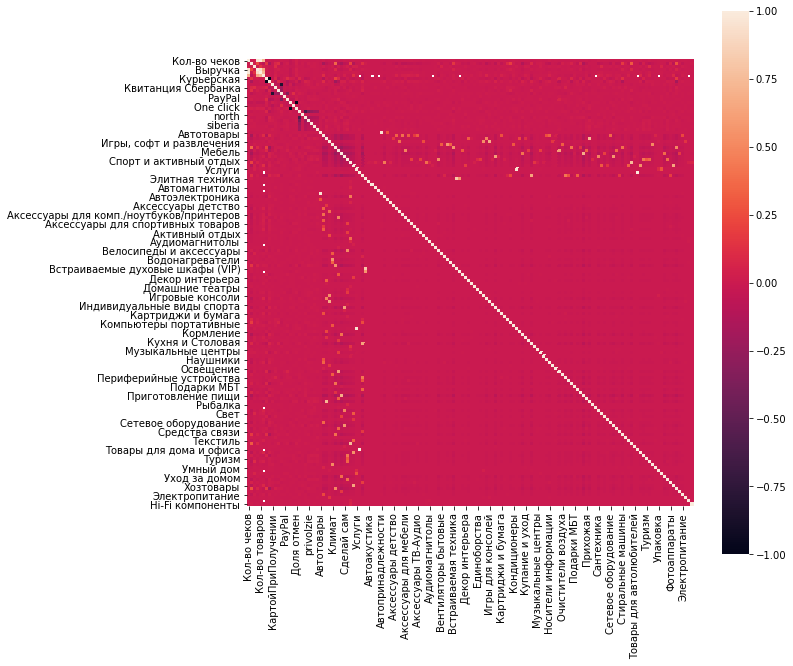

In [58]:
# импорт библиотек для графиков
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(correlations, square=True)
plt.show()

In [59]:
# Необходимо найти общую сумму, потраченную одним и тем же клиентом по всему набору данных
m = data.groupby('Клиент_ID')['Выручка'].sum()

m = pd.DataFrame(m).reset_index() 
m

,Клиент_ID,Выручка
0,32565748-000000000,19757
1,32565750-575448565151 а,26599
2,32565750-575448565151 а5,1590
3,43553240-575054413251+75,10129
4,55445748-514957495657715,27449
...,...,...
89540,57495456-56485151574991,1609
89541,57505548-48535350504991,999
89542,57555656-55575253555698,3850
89543,57565352-52575050555092,1999


In [60]:
# Необходимо найти общую сумму, потраченную одним и тем же клиентом по всему набору данных
m = data.groupby('Клиент_ID')['Выручка'].sum()

m = pd.DataFrame(m).reset_index() 
m

,Клиент_ID,Выручка
0,32565748-000000000,19757
1,32565750-575448565151 а,26599
2,32565750-575448565151 а5,1590
3,43553240-575054413251+75,10129
4,55445748-514957495657715,27449
...,...,...
89540,57495456-56485151574991,1609
89541,57505548-48535350504991,999
89542,57555656-55575253555698,3850
89543,57565352-52575050555092,1999


In [61]:
# посмотрим сколько дней прошло с самой ранней даты покупки
data['recency'] = data['Дата последнего заказа'] - pd.to_datetime('2016-03-01 00:00:00')

In [62]:
data1=data
data1

,Клиент_ID,Кол-во чеков,Средний чек,Среднее число товаров,Выручка,Кол-во товаров,Дата последнего заказа,Кол-во примененных акций,Курьерская,Самовывоз,КартойПриПолучении,Квитанция Сбербанка,Кредит в магазине,Наличные,PayPal,RBK Money,Доля выкупа,One click,Доля отмен,central,north,far east,privolzie,siberia,southern,ural,Автотовары,Аксессуары,Детские товары,"Игры, софт и развлечения",Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,"Хобби, досуг",Цифровая Техника,Элитная техника,Автоакустика,Автоаудио,Автомагнитолы,Автомультимедия,Автопринадлежности,Автоэлектроника,Аккумуляторы,Аксессуары авто,Аксессуары детство,Аксессуары для бытовой техники,Аксессуары для игровых приставок,Аксессуары для комп./ноутбуков/принтеров,Аксессуары для мебели,Аксессуары для смартфонов и планшетов,Аксессуары для спортивных товаров,Аксессуары для фото/видео,Аксессуары ТВ-Аудио,Активный отдых,Антивирусные программы,Аудио-Видео,Аудиомагнитолы,"Ванна, баня и сауна",Ванная,Велосипеды и аксессуары,Вентиляторы бытовые,Видеокамеры,Водонагреватели,Воздухонагреватели,Встраиваемая техника,Встраиваемые духовые шкафы (VIP),Встраиваемые микроволновые печи (VIP),Гостиная,Декор интерьера,Детская комната,Для мам,Домашние театры,Единоборства,Зимние виды спорта,Игровые консоли,Игрушки,Игры для консолей,Индивидуальные виды спорта,Инструменты,Камины,Картриджи и бумага,Командные виды спорта,Компьютеры настольные,Компьютеры портативные,Кондиционеры,Контракты сотовой связи и НТВ+,Кормление,Красота и здоровье,Купание и уход,Кухня и Столовая,Мобильные средства связи,Музыкальные инструменты,Музыкальные центры,Мягкая мебель,Навигация,Наушники,Носители информации,Операционные системы,Освещение,Офис и Кабинет,Очистители воздуха,Периферийные устройства,Планшеты,Плиты,Подарки МБТ,Портативная электроника,Посудомоечные машины,Приготовление пищи,Прихожая,Прогулки и путешествие,Рыбалка,Садовая мебель,Сантехника,Свет,СВЧ,Сервировка стола,Сетевое оборудование,Силовая и садовая техника,Спальня,Средства связи,Стиральные машины,Сушильные машины,Текстиль,Телевизоры LCD,Товары для автолюбителей,Товары для дома и офиса,Товары для кухни,Тренажеры,Туризм,Тяжелая атлетика,Увлажнители,Умный дом,Упаковка,Услуги по пластиковым картам,Уход за домом,Фитнес,Фотоаппараты,Хозтовары,Холодильное оборудование,Швейная техника,Электропитание,DVD с записью,DVD/Blu-Ray плееры и компоненты,Hi-Fi компоненты,recency
0,32565748-000000000,8,2469.625,1.0,19757,8,2016-04-26,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.484848,0.0,0.515152,0.875,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.375,0.125,0.0,0.0,0.125,0.0,0.125,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,56 days
1,32565750-575448565151 а,2,13299.500,1.0,26599,2,2016-03-31,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1.0,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,30 days
2,32565750-575448565151 а5,1,1590.000,1.0,1590,1,2016-04-12,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,1.000,0.0,0.0,0

In [63]:
def recency(recency):
    res = str(recency).split(' ')[0]
    return(int(res))

data1['recency'] = data1['recency'].apply(recency) 

In [64]:
recent = data1[['Клиент_ID','recency']]
recent

,Клиент_ID,recency
0,32565748-000000000,56
1,32565750-575448565151 а,30
2,32565750-575448565151 а5,42
3,43553240-575054413251+75,39
4,55445748-514957495657715,58
...,...,...
89540,57495456-56485151574991,13
89541,57505548-48535350504991,5
89542,57555656-55575253555698,49
89543,57565352-52575050555092,1


<function matplotlib.pyplot.show(*args, **kw)>

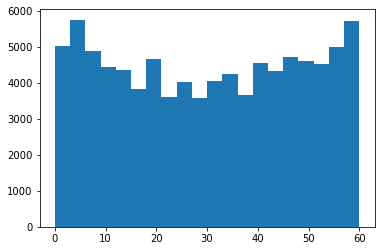

In [65]:
fig, ax = plt.subplots()
ax.hist(recent['recency'],bins=20, range=(0,60))
plt.show

In [66]:
# сколько раз каждый клиент совершал покупку
f = data[['Клиент_ID','Кол-во чеков']]
f

,Клиент_ID,Кол-во чеков
0,32565748-000000000,8
1,32565750-575448565151 а,2
2,32565750-575448565151 а5,1
3,43553240-575054413251+75,2
4,55445748-514957495657715,1
...,...,...
89540,57495456-56485151574991,1
89541,57505548-48535350504991,1
89542,57555656-55575253555698,1
89543,57565352-52575050555092,1


In [67]:
#rfm итоговая таблица
rfm = f.merge(m, on='Клиент_ID').merge(recent, on='Клиент_ID') 
rfm

,Клиент_ID,Кол-во чеков,Выручка,recency
0,32565748-000000000,8,19757,56
1,32565750-575448565151 а,2,26599,30
2,32565750-575448565151 а5,1,1590,42
3,43553240-575054413251+75,2,10129,39
4,55445748-514957495657715,1,27449,58
...,...,...,...,...
89540,57495456-56485151574991,1,1609,13
89541,57505548-48535350504991,1,999,5
89542,57555656-55575253555698,1,3850,49
89543,57565352-52575050555092,1,1999,1


In [68]:
rfm.rename(columns = {'Кол-во чеков' : 'frequency', 'Выручка' : 'monetary_value', 'Клиент_ID' : 'customer_ID'}, inplace = True)
rfm

,customer_ID,frequency,monetary_value,recency
0,32565748-000000000,8,19757,56
1,32565750-575448565151 а,2,26599,30
2,32565750-575448565151 а5,1,1590,42
3,43553240-575054413251+75,2,10129,39
4,55445748-514957495657715,1,27449,58
...,...,...,...,...
89540,57495456-56485151574991,1,1609,13
89541,57505548-48535350504991,1,999,5
89542,57555656-55575253555698,1,3850,49
89543,57565352-52575050555092,1,1999,1


In [69]:
#0.33 или 0.27
quantiles = rfm.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_rfm = rfm

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5
    
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(RScore, args=('monetary_value',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
print(segmented_rfm.head())

                customer_ID  frequency  monetary_value  recency  r_quartile  \
0        32565748-000000000          8           19757       56           5   
1   32565750-575448565151 а          2           26599       30           3   
2  32565750-575448565151 а5          1            1590       42           4   
3  43553240-575054413251+75          2           10129       39           4   
4  55445748-514957495657715          1           27449       58           5   

   f_quartile  m_quartile RFMScore  
0           5           5      555  
1           5           5      355  
2           1           1      411  
3           5           4      454  
4           1           5      515  


Стандартизация оценки каждого клиента по каждому параметру (0-100) Стандартизация = текущее значение/Макс(Значение) * 100

In [70]:
segmented_rfm["r_score"]=segmented_rfm['r_quartile']/max(segmented_rfm['r_quartile'])*100
segmented_rfm["f_score"]=segmented_rfm['f_quartile']/max(segmented_rfm['f_quartile'])*100
segmented_rfm["m_score"]=segmented_rfm['m_quartile']/max(segmented_rfm['m_quartile'])*100
print(segmented_rfm.head())

                customer_ID  frequency  monetary_value  recency  r_quartile  \
0        32565748-000000000          8           19757       56           5   
1   32565750-575448565151 а          2           26599       30           3   
2  32565750-575448565151 а5          1            1590       42           4   
3  43553240-575054413251+75          2           10129       39           4   
4  55445748-514957495657715          1           27449       58           5   

   f_quartile  m_quartile RFMScore  r_score  f_score  m_score  
0           5           5      555    100.0    100.0    100.0  
1           5           5      355     60.0    100.0    100.0  
2           1           1      411     80.0     20.0     20.0  
3           5           4      454     80.0    100.0     80.0  
4           1           5      515    100.0     20.0    100.0  


Сводный балл = 0,15R + 0,28F + 0,57*M

In [71]:
segmented_rfm["final_score"]=segmented_rfm['r_score']*0.15+segmented_rfm['f_score']*0.28+segmented_rfm['m_score']*0.57
segmented_rfm["final_score"]=round(segmented_rfm["final_score"], 0)
print(segmented_rfm.head())

                customer_ID  frequency  monetary_value  recency  r_quartile  \
0        32565748-000000000          8           19757       56           5   
1   32565750-575448565151 а          2           26599       30           3   
2  32565750-575448565151 а5          1            1590       42           4   
3  43553240-575054413251+75          2           10129       39           4   
4  55445748-514957495657715          1           27449       58           5   

   f_quartile  m_quartile RFMScore  r_score  f_score  m_score  final_score  
0           5           5      555    100.0    100.0    100.0        100.0  
1           5           5      355     60.0    100.0    100.0         94.0  
2           1           1      411     80.0     20.0     20.0         29.0  
3           5           4      454     80.0    100.0     80.0         86.0  
4           1           5      515    100.0     20.0    100.0         78.0  


Затем мы разделили оценки на три сегмента:

0 — 50 — клиент с низкой ценностью 50 — 75 – клиент со средней ценностью 76 — 100 – клиент с высокой ценностью

In [72]:
segmented_rfm['group'] = np.where(segmented_rfm['final_score'] <= 50, 'low', 'medium') 
segmented_rfm['group']= np.where(segmented_rfm['final_score'] >= 76, 'high', segmented_rfm['group'])
segmented_rfm

,customer_ID,frequency,monetary_value,recency,r_quartile,f_quartile,m_quartile,RFMScore,r_score,f_score,m_score,final_score,group
0,32565748-000000000,8,19757,56,5,5,5,555,100.0,100.0,100.0,100.0,high
1,32565750-575448565151 а,2,26599,30,3,5,5,355,60.0,100.0,100.0,94.0,high
2,32565750-575448565151 а5,1,1590,42,4,1,1,411,80.0,20.0,20.0,29.0,low
3,43553240-575054413251+75,2,10129,39,4,5,4,454,80.0,100.0,80.0,86.0,high
4,55445748-514957495657715,1,27449,58,5,1,5,515,100.0,20.0,100.0,78.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89540,57495456-56485151574991,1,1609,13,2,1,1,211,40.0,20.0,20.0,23.0,low
89541,57505548-48535350504991,1,999,5,1,1,1,111,20.0,20.0,20.0,20.0,low
89542,57555656-55575253555698,1,3850,49,4,1,2,412,80.0,20.0,40.0,40.0,low
89543,57565352-52575050555092,1,1999,1,1,1,2,112,20.0,20.0,40.0,31.0,low


In [73]:
segmented_rfm['group'].value_counts()

low       42516
medium    35607
high      11422
Name: group, dtype: int64

In [74]:
segmented_rfm.to_excel('final.xlsx')

KeyboardInterrupt: 

## Метод k-means 

In [75]:
data = pd.read_excel("Vitrina.xlsx", sheet_name = "Витрина")

In [76]:
#data = data.rename(columns = data.iloc[0])
data

,Клиент_ID,Кол-во чеков,Средний чек,Среднее число товаров,Выручка,Кол-во товаров,Дата последнего заказа,Кол-во примененных акций,Курьерская,Самовывоз,КартойПриПолучении,Квитанция Сбербанка,Кредит в магазине,Наличные,PayPal,RBK Money,Доля выкупа,One click,Доля отмен,central,north,far east,privolzie,siberia,southern,ural,Автотовары,Аксессуары,Детские товары,"Игры, софт и развлечения",Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,"Хобби, досуг",Цифровая Техника,Элитная техника,Автоакустика,Автоаудио,Автомагнитолы,Автомультимедия,Автопринадлежности,Автоэлектроника,Аккумуляторы,Аксессуары авто,Аксессуары детство,Аксессуары для бытовой техники,Аксессуары для игровых приставок,Аксессуары для комп./ноутбуков/принтеров,Аксессуары для мебели,Аксессуары для смартфонов и планшетов,Аксессуары для спортивных товаров,Аксессуары для фото/видео,Аксессуары ТВ-Аудио,Активный отдых,Антивирусные программы,Аудио-Видео,Аудиомагнитолы,"Ванна, баня и сауна",Ванная,Велосипеды и аксессуары,Вентиляторы бытовые,Видеокамеры,Водонагреватели,Воздухонагреватели,Встраиваемая техника,Встраиваемые духовые шкафы (VIP),Встраиваемые микроволновые печи (VIP),Гостиная,Декор интерьера,Детская комната,Для мам,Домашние театры,Единоборства,Зимние виды спорта,Игровые консоли,Игрушки,Игры для консолей,Индивидуальные виды спорта,Инструменты,Камины,Картриджи и бумага,Командные виды спорта,Компьютеры настольные,Компьютеры портативные,Кондиционеры,Контракты сотовой связи и НТВ+,Кормление,Красота и здоровье,Купание и уход,Кухня и Столовая,Мобильные средства связи,Музыкальные инструменты,Музыкальные центры,Мягкая мебель,Навигация,Наушники,Носители информации,Операционные системы,Освещение,Офис и Кабинет,Очистители воздуха,Периферийные устройства,Планшеты,Плиты,Подарки МБТ,Портативная электроника,Посудомоечные машины,Приготовление пищи,Прихожая,Прогулки и путешествие,Рыбалка,Садовая мебель,Сантехника,Свет,СВЧ,Сервировка стола,Сетевое оборудование,Силовая и садовая техника,Спальня,Средства связи,Стиральные машины,Сушильные машины,Текстиль,Телевизоры LCD,Товары для автолюбителей,Товары для дома и офиса,Товары для кухни,Тренажеры,Туризм,Тяжелая атлетика,Увлажнители,Умный дом,Упаковка,Услуги по пластиковым картам,Уход за домом,Фитнес,Фотоаппараты,Хозтовары,Холодильное оборудование,Швейная техника,Электропитание,DVD с записью,DVD/Blu-Ray плееры и компоненты,Hi-Fi компоненты
0,32565748-000000000,8,2469.625000,1.000000,19757,8,2016-04-26,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.484848,0.0,0.515152,0.875000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.375,0.125,0.0,0.0,0.125,0.0,0.125,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0
1,32565750-575448565151 а,2,13299.500000,1.000000,26599,2,2016-03-31,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.0,1.0,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,32565750-575448565151 а5,1,1590.000000,1.000000,1590,1,2016-04-12,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1

In [77]:
data = data.drop(index=[89545])
clmn = data.columns[1:]
data = data.fillna(0)

In [78]:
data['Дата последнего заказа'] = data['Дата последнего заказа'].apply(lambda x: x.value)

In [79]:
df = data[clmn]

In [80]:
from sklearn import preprocessing

d = preprocessing.normalize(df, axis = 0)

scaled_df = pd.DataFrame(d)
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148
0,0.006118,0.000612,0.002984,0.001182,0.005915,0.003347,0.000000,0.000000,0.003893,0.000000,0.0,0.0,0.003884,0.0,0.0,0.001705,0.000000,0.008903,0.004002,0.0,0.000844,0.0,0.0,0.0,0.0,0.0,0.004541,0.001534,0.0,0.000000,0.001083,0.0,0.000895,0.0,0.000000,0.003622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003992,0.0,0.0,0.0,0.0,0.0,0.00377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.001997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006409,0.0,0.0,0.0
1,0.001529,0.003298,0.002984,0.001591,0.001479,0.003342,0.000000,0.000000,0.003893,0.000000,0.0,0.0,0.003884,0.0,0.0,0.003516,0.000000,0.000000,0.004574,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.023511,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080659,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000765,0.000394,0.002984,0.000095,0.000739,0.003344,0.000000,0.000000,0.003893,0.007786,0.0,0.0,0.000000,0.0,0.0,0.003516,0.000000,0.000000,0.000000,0.0,0.006755,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.007161,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.015975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.001529,0.001256,0.002984,0.000606,0.001479,0.003344,0.000000,0.000000,0.003893,0.000000,0.0,0.0,0.003884,0.0,0.0,0.000820,0.000000,0.009793,0.000000,0.0,0.006755,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.011755,0.000000,0.0,0.003581,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.022766,0.0,0.0,0.0,0.008567,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000765,0.006806,0.002984,0.001642,0.000739,0.003347,0.003409,0.006562,0.000000,0.007786,0.0,0.0,0.000000,0.0,0.0,0.003516,0.000000,0.000000,0.000000,0.0,0.006755,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.008666,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.

In [81]:
clmn_new = scaled_df.columns
clmn_new

RangeIndex(start=0, stop=149, step=1)

In [82]:
old_names = clmn
new_names = clmn_new
n = scaled_df.rename(columns=dict(zip(clmn_new, clmn)), inplace=True) 
scaled_df.columns = clmn
scaled_df

,Кол-во чеков,Средний чек,Среднее число товаров,Выручка,Кол-во товаров,Дата последнего заказа,Кол-во примененных акций,Курьерская,Самовывоз,КартойПриПолучении,Квитанция Сбербанка,Кредит в магазине,Наличные,PayPal,RBK Money,Доля выкупа,One click,Доля отмен,central,north,far east,privolzie,siberia,southern,ural,Автотовары,Аксессуары,Детские товары,"Игры, софт и развлечения",Климат,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,"Хобби, досуг",Цифровая Техника,Элитная техника,Автоакустика,Автоаудио,Автомагнитолы,Автомультимедия,Автопринадлежности,Автоэлектроника,Аккумуляторы,Аксессуары авто,Аксессуары детство,Аксессуары для бытовой техники,Аксессуары для игровых приставок,Аксессуары для комп./ноутбуков/принтеров,Аксессуары для мебели,Аксессуары для смартфонов и планшетов,Аксессуары для спортивных товаров,Аксессуары для фото/видео,Аксессуары ТВ-Аудио,Активный отдых,Антивирусные программы,Аудио-Видео,Аудиомагнитолы,"Ванна, баня и сауна",Ванная,Велосипеды и аксессуары,Вентиляторы бытовые,Видеокамеры,Водонагреватели,Воздухонагреватели,Встраиваемая техника,Встраиваемые духовые шкафы (VIP),Встраиваемые микроволновые печи (VIP),Гостиная,Декор интерьера,Детская комната,Для мам,Домашние театры,Единоборства,Зимние виды спорта,Игровые консоли,Игрушки,Игры для консолей,Индивидуальные виды спорта,Инструменты,Камины,Картриджи и бумага,Командные виды спорта,Компьютеры настольные,Компьютеры портативные,Кондиционеры,Контракты сотовой связи и НТВ+,Кормление,Красота и здоровье,Купание и уход,Кухня и Столовая,Мобильные средства связи,Музыкальные инструменты,Музыкальные центры,Мягкая мебель,Навигация,Наушники,Носители информации,Операционные системы,Освещение,Офис и Кабинет,Очистители воздуха,Периферийные устройства,Планшеты,Плиты,Подарки МБТ,Портативная электроника,Посудомоечные машины,Приготовление пищи,Прихожая,Прогулки и путешествие,Рыбалка,Садовая мебель,Сантехника,Свет,СВЧ,Сервировка стола,Сетевое оборудование,Силовая и садовая техника,Спальня,Средства связи,Стиральные машины,Сушильные машины,Текстиль,Телевизоры LCD,Товары для автолюбителей,Товары для дома и офиса,Товары для кухни,Тренажеры,Туризм,Тяжелая атлетика,Увлажнители,Умный дом,Упаковка,Услуги по пластиковым картам,Уход за домом,Фитнес,Фотоаппараты,Хозтовары,Холодильное оборудование,Швейная техника,Электропитание,DVD с записью,DVD/Blu-Ray плееры и компоненты,Hi-Fi компоненты
0,0.006118,0.000612,0.002984,0.001182,0.005915,0.003347,0.000000,0.000000,0.003893,0.000000,0.0,0.0,0.003884,0.0,0.0,0.001705,0.000000,0.008903,0.004002,0.0,0.000844,0.0,0.0,0.0,0.0,0.0,0.004541,0.001534,0.0,0.000000,0.001083,0.0,0.000895,0.0,0.000000,0.003622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003992,0.0,0.0,0.0,0.0,0.0,0.00377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.001997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006409,0.0,0.0,0.0
1,0.001529,0.003298,0.002984,0.001591,0.001479,0.003342,0.000000,0.000000,0.003893,0.000000,0.0,0.0,0.003884,0.0,0.0,0.003516,0.000000,0.000000,0.004574,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.023511,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080659,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000

In [83]:
data_norm1 = scaled_df.drop( columns = ["Выручка", "Кол-во товаров", "Самовывоз", "Наличные", "Доля отмен", "central", "far east", "Автопринадлежности", "Автоэлектроника", "Аксессуары для мебели", "Ванная", "Водонагреватели", "Встраиваемая техника", "Встраиваемые духовые шкафы (VIP)"])

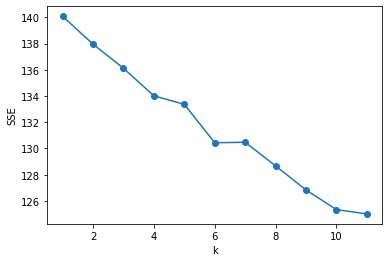

In [84]:
from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt
SSE = [] # Сумма квадратов ошибок для каждого результата
for k in range(1,12):
    estimator = KMeans (n_clusters = k) # построить кластер
    estimator.fit(scaled_df) 
    SSE.append(estimator.inertia_) 
X = range(1, 12)
plt.xlabel('k') 
plt.ylabel('SSE')
plt.plot(X,SSE,'o-') 
plt.show()

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_norm1)
segment_data = pca.transform(data_norm1)

In [86]:
import sys
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [ ]:
sizedata=[len(segment_data), len(segment_data[0])]
gap=[]
SD=[]    
print(4)
for knum in range(1, 10):
    print(knum)
    #Clustering original Data
    kmeanspp = KMeans(n_clusters=knum)
    kmeanspp.fit(segment_data)
    dispersion = kmeanspp.inertia_
    #Clustering Reference Data
    nrefs = 4
    refDisp = np.zeros(nrefs)
    for nref in range(nrefs):
        refdata = np.random.random_sample((sizedata[0],sizedata[1]))
        refkmeans = KMeans(n_clusters=knum,init='k-means++')
        refkmeans.fit(refdata)
        refdisp = refkmeans.inertia_
        refDisp[nref]=np.log(refdisp)
    mean_log_refdisp = np.mean(refDisp)
    gap.append(mean_log_refdisp-np.log(dispersion))
    #Calculating standard deviaiton
    sd = (sum([(r-m)**2 for r,m in zip(refDisp,[mean_log_refdisp]*nrefs)])/nrefs)**0.5
    SD.append(sd)
SD = [sd*((1+(1/nrefs))**0.5) for sd in SD]
#determining optimal k
opt_k = None
diff = []
for i in range(len(gap)-1):
    diff = (SD[i+1]-(gap[i+1]-gap[i]))
    if diff>0:
        break
        opt_k = i+10
print(diff)
plt.plot(np.linspace(7,19,9,True),gap)
plt.show()

4
1
2
3
4
5
6
7
8


In [89]:
kmeans = KMeans(n_clusters=5, random_state=555).fit(scaled_df)
kmeans.cluster_centers_

array([[ 1.02825445e-03,  1.98822566e-03,  3.10532977e-03,
         6.55828156e-04,  1.04636014e-03,  3.34193223e-03,
         1.44105232e-03,  1.80500916e-03,  2.82185503e-03,
         1.43256896e-03,  3.37589743e-04,  4.03606004e-04,
         2.91519930e-03,  1.30182827e-04,  6.38854008e-04,
         3.27637647e-03,  8.99859501e-04,  1.13224099e-03,
         2.41585460e-03,  6.79766800e-05,  1.65779369e-03,
         1.12018145e-03,  7.52686024e-04,  6.21792131e-04,
         5.85563660e-04,  8.72505429e-05,  1.09752104e-03,
         1.05989279e-03,  2.30830117e-04,  5.65549373e-04,
         1.51885682e-03,  8.83032343e-04,  1.83505020e-03,
         1.19381643e-03,  1.12934180e-03,  9.28458788e-04,
         5.37754533e-04,  1.15842475e-05,  1.27860887e-05,
         2.85929769e-05,  2.21461553e-05,  2.55721775e-05,
         1.27860887e-05,  6.39500788e-05,  1.27860887e-05,
         8.44027995e-05,  4.18073016e-04,  2.21461553e-05,
         6.55187863e-05,  1.76842620e-04,  4.08818307e-0

In [90]:
km3 = KMeans(n_clusters = 3)

In [91]:
y_predicted = km3.fit_predict(segment_data) 

In [92]:
data['cluster_fin3'] = y_predicted  
df5 = data[data.cluster_fin3 == 0]
df6 = data[data.cluster_fin3 == 1]
df7 = data[data.cluster_fin3 == 2]
df8 = data[data.cluster_fin3 == 3]

print(len(df5))
print(len(df6))
print(len(df7))
print(len(df8))

69626
13093
6826
0


In [93]:
km4 = KMeans(n_clusters = 4)

In [94]:
y_predicted_1 = km4.fit_predict(segment_data) 

In [95]:
data['cluster_fin4'] = y_predicted_1  #ЭТО
df9 = data[data.cluster_fin4 == 0]
df10 = data[data.cluster_fin4 == 1]
df11 = data[data.cluster_fin4 == 2]
df12 = data[data.cluster_fin4 == 3]

print(len(df9), round(len(df9)/89545*100, 0))
print(len(df10), round(len(df10)/89545*100, 0))
print(len(df11), round(len(df11)/89545*100, 0))
print(len(df12), round(len(df12)/89545*100, 0))

56725 63.0
10176 11.0
13967 16.0
8677 10.0


In [96]:
km5 = KMeans(n_clusters = 5)
y_predicted_2 = km5.fit_predict(segment_data) 
len(y_predicted_2)

89545

In [97]:
data['cluster_fin5'] = y_predicted_2  
df13 = data[data.cluster_fin5 == 0]
df14 = data[data.cluster_fin5 == 1]
df15 = data[data.cluster_fin5 == 2]
df16 = data[data.cluster_fin5 == 3]
df17 = data[data.cluster_fin5 == 4]
print(len(df13))
print(len(df14))
print(len(df15))
print(len(df16))
print(len(df17))

313
6789
27301
8679
46463


In [98]:
km6 = KMeans(n_clusters = 6)
y_predicted_6 = km6.fit_predict(segment_data) 
data['cluster_fin6'] = y_predicted_6  
df18 = data[data.cluster_fin6 == 0]
df19 = data[data.cluster_fin6 == 1]
df20 = data[data.cluster_fin6 == 2]
df21 = data[data.cluster_fin6 == 3]
df22 = data[data.cluster_fin6 == 4]
df23 = data[data.cluster_fin6 == 5]
print(len(df18))
print(len(df19))
print(len(df20))
print(len(df21))
print(len(df22))
print(len(df23))

752
40864
10112
1
5152
32664


In [99]:
km7 = KMeans(n_clusters = 7)
y_predicted_7 = km7.fit_predict(segment_data) 
data['cluster_fin7'] = y_predicted_7  #ЭТО
df18 = data[data.cluster_fin7 == 0]
df19 = data[data.cluster_fin7 == 1]
df20 = data[data.cluster_fin7 == 2]
df21 = data[data.cluster_fin7 == 3]
df22 = data[data.cluster_fin7 == 4]
df23 = data[data.cluster_fin7 == 5]
df24 = data[data.cluster_fin7 == 6]
print(len(df18))
print(len(df19))
print(len(df20))
print(len(df21))
print(len(df22))
print(len(df23))
print(len(df24))

7515
2968
1291
5105
63890
8393
383


In [100]:
km8 = KMeans(n_clusters = 8)
y_predicted_8 = km8.fit_predict(segment_data) 
data['cluster_fin8'] = y_predicted_8  #ЭТО
df18 = data[data.cluster_fin8 == 0]
df19 = data[data.cluster_fin8 == 1]
df20 = data[data.cluster_fin8 == 2]
df21 = data[data.cluster_fin8 == 3]
df22 = data[data.cluster_fin8 == 4]
df23 = data[data.cluster_fin8 == 5]
df24 = data[data.cluster_fin8 == 6]
df25 = data[data.cluster_fin8 == 7]
print(len(df18))
print(len(df19))
print(len(df20))
print(len(df21))
print(len(df22))
print(len(df23))
print(len(df24))
print(len(df25))

1056
22318
268
45855
8586
4679
6780
3


In [101]:
km9 = KMeans(n_clusters = 9)
y_predicted_9 = km9.fit_predict(segment_data) 
data['cluster_fin9'] = y_predicted_9  #ЭТО
df18 = data[data.cluster_fin9 == 0]
df19 = data[data.cluster_fin9 == 1]
df20 = data[data.cluster_fin9 == 2]
df21 = data[data.cluster_fin9 == 3]
df22 = data[data.cluster_fin9 == 4]
df23 = data[data.cluster_fin9 == 5]
df24 = data[data.cluster_fin9 == 6]
df25 = data[data.cluster_fin9 == 7]
df26 = data[data.cluster_fin9 == 8]
print(len(df18))
print(len(df19))
print(len(df20))
print(len(df21))
print(len(df22))
print(len(df23))
print(len(df24))
print(len(df25))
print(len(df26))

8602
9940
1067
236
59758
750
1654
6024
1514


In [102]:
km10 = KMeans(n_clusters = 10)
y_predicted_10 = km10.fit_predict(segment_data) 
data['cluster_fin10'] = y_predicted_10  #ЭТО
df18 = data[data.cluster_fin10 == 0]
df19 = data[data.cluster_fin10 == 1]
df20 = data[data.cluster_fin10 == 2]
df21 = data[data.cluster_fin10 == 3]
df22 = data[data.cluster_fin10 == 4]
df23 = data[data.cluster_fin10 == 5]
df24 = data[data.cluster_fin10 == 6]
df25 = data[data.cluster_fin10 == 7]
df26 = data[data.cluster_fin10 == 8]
df27 = data[data.cluster_fin10 == 9]
print(len(df18), round(len(df18)/89545*100, 0))
print(len(df19), round(len(df19)/89545*100, 0))
print(len(df20), round(len(df20)/89545*100, 0))
print(len(df21), round(len(df21)/89545*100, 0))
print(len(df22), round(len(df22)/89545*100, 0))
print(len(df23), round(len(df23)/89545*100, 0))
print(len(df24), round(len(df24)/89545*100, 0))
print(len(df25), round(len(df25)/89545*100, 0))
print(len(df26), round(len(df26)/89545*100, 0))
print(len(df27), round(len(df27)/89545*100, 0))

9707 11.0
1513 2.0
8583 10.0
981 1.0
1533 2.0
2965 3.0
34 0.0
52816 59.0
6753 8.0
4660 5.0


In [103]:
km11 = KMeans(n_clusters = 11)
y_predicted_11 = km11.fit_predict(segment_data) 
data['cluster_fin11'] = y_predicted_11  #ЭТО
df18 = data[data.cluster_fin11 == 0]
df19 = data[data.cluster_fin11 == 1]
df20 = data[data.cluster_fin11 == 2]
df21 = data[data.cluster_fin11 == 3]
df22 = data[data.cluster_fin11 == 4]
df23 = data[data.cluster_fin11 == 5]
df24 = data[data.cluster_fin11 == 6]
df25 = data[data.cluster_fin11 == 7]
df26 = data[data.cluster_fin11 == 8]
df27 = data[data.cluster_fin11 == 9]
df28 = data[data.cluster_fin11 == 10]
print(len(df18), round(len(df18)/89545*100, 0))
print(len(df19), round(len(df19)/89545*100, 0))
print(len(df20), round(len(df20)/89545*100, 0))
print(len(df21), round(len(df21)/89545*100, 0))
print(len(df22), round(len(df22)/89545*100, 0))
print(len(df23), round(len(df23)/89545*100, 0))
print(len(df24), round(len(df24)/89545*100, 0))
print(len(df25), round(len(df25)/89545*100, 0))
print(len(df26), round(len(df26)/89545*100, 0))
print(len(df27), round(len(df27)/89545*100, 0))
print(len(df28), round(len(df28)/89545*100, 0))

357 0.0
5619 6.0
37852 42.0
3032 3.0
9761 11.0
1 0.0
21789 24.0
6791 8.0
1528 2.0
410 0.0
2405 3.0


In [104]:
km12 = KMeans(n_clusters = 12)
y_predicted_12 = km12.fit_predict(segment_data) 
data['cluster_fin12'] = y_predicted_12  #ЭТО
df18 = data[data.cluster_fin11 == 0]
df19 = data[data.cluster_fin11 == 1]
df20 = data[data.cluster_fin11 == 2]
df21 = data[data.cluster_fin11 == 3]
df22 = data[data.cluster_fin11 == 4]
df23 = data[data.cluster_fin11 == 5]
df24 = data[data.cluster_fin11 == 6]
df25 = data[data.cluster_fin11 == 7]
df26 = data[data.cluster_fin11 == 8]
df27 = data[data.cluster_fin11 == 9]
df28 = data[data.cluster_fin11 == 10]
df29 = data[data.cluster_fin11 == 11]
print(len(df18), round(len(df18)/89545*100, 0))
print(len(df19), round(len(df19)/89545*100, 0))
print(len(df20), round(len(df20)/89545*100, 0))
print(len(df21), round(len(df21)/89545*100, 0))
print(len(df22), round(len(df22)/89545*100, 0))
print(len(df23), round(len(df23)/89545*100, 0))
print(len(df24), round(len(df24)/89545*100, 0))
print(len(df25), round(len(df25)/89545*100, 0))
print(len(df26), round(len(df26)/89545*100, 0))
print(len(df27), round(len(df27)/89545*100, 0))
print(len(df28), round(len(df28)/89545*100, 0))
print(len(df29), round(len(df29)/89545*100, 0))

357 0.0
5619 6.0
37852 42.0
3032 3.0
9761 11.0
1 0.0
21789 24.0
6791 8.0
1528 2.0
410 0.0
2405 3.0
0 0.0


In [105]:
km13 = KMeans(n_clusters = 13)
y_predicted_13 = km13.fit_predict(segment_data) 
data['cluster_fin13'] = y_predicted_13  #ЭТО
df18 = data[data.cluster_fin13 == 0]
df19 = data[data.cluster_fin13 == 1]
df20 = data[data.cluster_fin13 == 2]
df21 = data[data.cluster_fin13 == 3]
df22 = data[data.cluster_fin13 == 4]
df23 = data[data.cluster_fin13 == 5]
df24 = data[data.cluster_fin13 == 6]
df25 = data[data.cluster_fin13 == 7]
df26 = data[data.cluster_fin13 == 8]
df27 = data[data.cluster_fin13 == 9]
df28 = data[data.cluster_fin13 == 10]
df29 = data[data.cluster_fin13 == 11]
df30 = data[data.cluster_fin13 == 12]
print(len(df18), round(len(df18)/89545*100, 0))
print(len(df19), round(len(df19)/89545*100, 0))
print(len(df20), round(len(df20)/89545*100, 0))
print(len(df21), round(len(df21)/89545*100, 0))
print(len(df22), round(len(df22)/89545*100, 0))
print(len(df23), round(len(df23)/89545*100, 0))
print(len(df24), round(len(df24)/89545*100, 0))
print(len(df25), round(len(df25)/89545*100, 0))
print(len(df26), round(len(df26)/89545*100, 0))
print(len(df27), round(len(df27)/89545*100, 0))
print(len(df28), round(len(df28)/89545*100, 0))
print(len(df29), round(len(df29)/89545*100, 0))
print(len(df30), round(len(df30)/89545*100, 0))

2235 2.0
6324 7.0
7884 9.0
523 1.0
1709 2.0
4470 5.0
1098 1.0
5139 6.0
13878 15.0
5074 6.0
2438 3.0
2122 2.0
36651 41.0


In [106]:
km14 = KMeans(n_clusters = 14)
y_predicted_14 = km14.fit_predict(segment_data) 
data['cluster_fin14'] = y_predicted_14  #ЭТО
df18 = data[data.cluster_fin14 == 0]
df19 = data[data.cluster_fin14 == 1]
df20 = data[data.cluster_fin14 == 2]
df21 = data[data.cluster_fin14 == 3]
df22 = data[data.cluster_fin14 == 4]
df23 = data[data.cluster_fin14 == 5]
df24 = data[data.cluster_fin14 == 6]
df25 = data[data.cluster_fin14 == 7]
df26 = data[data.cluster_fin14 == 8]
df27 = data[data.cluster_fin14 == 9]
df28 = data[data.cluster_fin14 == 10]
df29 = data[data.cluster_fin14 == 11]
df30 = data[data.cluster_fin14 == 12]
df31 = data[data.cluster_fin14 == 13]
print(len(df18), round(len(df18)/89545*100, 0))
print(len(df19), round(len(df19)/89545*100, 0))
print(len(df20), round(len(df20)/89545*100, 0))
print(len(df21), round(len(df21)/89545*100, 0))
print(len(df22), round(len(df22)/89545*100, 0))
print(len(df23), round(len(df23)/89545*100, 0))
print(len(df24), round(len(df24)/89545*100, 0))
print(len(df25), round(len(df25)/89545*100, 0))
print(len(df26), round(len(df26)/89545*100, 0))
print(len(df27), round(len(df27)/89545*100, 0))
print(len(df28), round(len(df28)/89545*100, 0))
print(len(df29), round(len(df29)/89545*100, 0))
print(len(df30), round(len(df30)/89545*100, 0))
print(len(df31), round(len(df31)/89545*100, 0))

6757 8.0
4239 5.0
10020 11.0
13896 16.0
1 0.0
62 0.0
1054 1.0
46658 52.0
2201 2.0
3130 3.0
523 1.0
806 1.0
145 0.0
53 0.0


In [107]:
import random
random.seed(12345)

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [108]:
start = 1
for i in range(27):
    f = KMeans(n_clusters = (i+start))
    predicted = f.fit_predict(segment_data) 
    string = 'cluster_fin'
    new_string = string + str(start + i)
    data[new_string] = predicted
    print('-----------------cluster = ', i + start,'--------------')
    for j in range(start +i):
        k = len(data[data[new_string] == j])
        print(k, round(k/89545*100, 0))

-----------------cluster =  1 --------------
89545 100.0
-----------------cluster =  2 --------------
80849 90.0
8696 10.0
-----------------cluster =  3 --------------
84342 94.0
53 0.0
5150 6.0
-----------------cluster =  4 --------------
7742 9.0
7013 8.0
8168 9.0
66622 74.0
-----------------cluster =  5 --------------
474 1.0
59600 67.0
13946 16.0
8689 10.0
6836 8.0
-----------------cluster =  6 --------------
29658 33.0
8044 9.0
9273 10.0
8537 10.0
34032 38.0
1 0.0
-----------------cluster =  7 --------------
8693 10.0
60699 68.0
726 1.0
13915 16.0
5131 6.0
145 0.0
236 0.0
-----------------cluster =  8 --------------
6787 8.0
11336 13.0
50578 56.0
1298 1.0
1095 1.0
5138 6.0
4670 5.0
8643 10.0
-----------------cluster =  9 --------------
1532 2.0
1 0.0
1138 1.0
6785 8.0
4671 5.0
2470 3.0
13913 16.0
53834 60.0
5201 6.0
-----------------cluster =  10 --------------
53952 60.0
6815 8.0
53 0.0
13899 16.0
1538 2.0
1 0.0
1518 2.0
598 1.0
10121 11.0
1050 1.0
-----------------cluster =  11 